In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('airline_food_data_last.csv')
X = df.drop(['total_food_demand', 'flight_id'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_mean = y_train.mean()
print(f"Eğitim Seti Ortalaması (Tahmin Değeri): {train_mean:.2f}")

y_pred_baseline = np.full(shape=y_test.shape, fill_value=train_mean)

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
baseline_rmse = np.sqrt(baseline_mse)
baseline_r2 = r2_score(y_test, y_pred_baseline)

print(f"R² Skoru : {baseline_r2:.5f}")
print(f"MAE      : {baseline_mae:.2f}")
print(f"RMSE     : {baseline_rmse:.2f}")


Eğitim Seti Ortalaması (Tahmin Değeri): 199.60
R² Skoru : -0.00088
MAE      : 66.93
RMSE     : 76.92


--- Linear Regression Sonuçları ---
R² (Başarı Skoru): 0.9937
MAE (Ortalama Hata): 4.8849
RMSE (Kök Ortalama Kare Hata): 6.0855

--- Hangi Özellik Sonucu Nasıl Etkiliyor? ---
                Özellik    Katsayı
0       flight_duration   2.549395
1       passenger_count   0.650839
2      adult_passengers   0.428456
3      child_passengers   0.222383
4  business_class_ratio  87.898261
5      is_international   0.070784


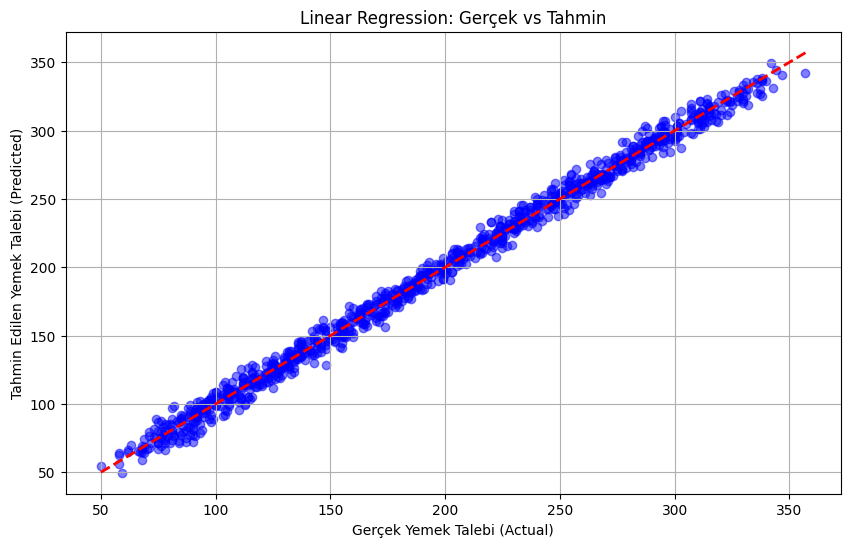

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('airline_food_data_last.csv')

X = df.drop(['flight_id', 'total_food_demand'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Linear Regression Sonuçları ---")
print(f"R² (Başarı Skoru): {r2:.4f}")
print(f"MAE (Ortalama Hata): {mae:.4f}")
print(f"RMSE (Kök Ortalama Kare Hata): {rmse:.4f}")

feature_importance = pd.DataFrame({'Özellik': X.columns, 'Katsayı': lr_model.coef_})
print("\n--- Hangi Özellik Sonucu Nasıl Etkiliyor? ---")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Gerçek Yemek Talebi (Actual)')
plt.ylabel('Tahmin Edilen Yemek Talebi (Predicted)')
plt.title('Linear Regression: Gerçek vs Tahmin')
plt.grid(True)
plt.show()

Data Loaded. Shape: (5000, 8)
Training samples: 4000
Testing samples: 1000
Training Random Forest Model...
Training Complete.
Random Forest Performance Metrics:
R-squared (R2): 0.9941
Mean Absolute Error (MAE): 4.73
Root Mean Squared Error (RMSE): 5.92


/tmp/ipython-input-1986334224.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


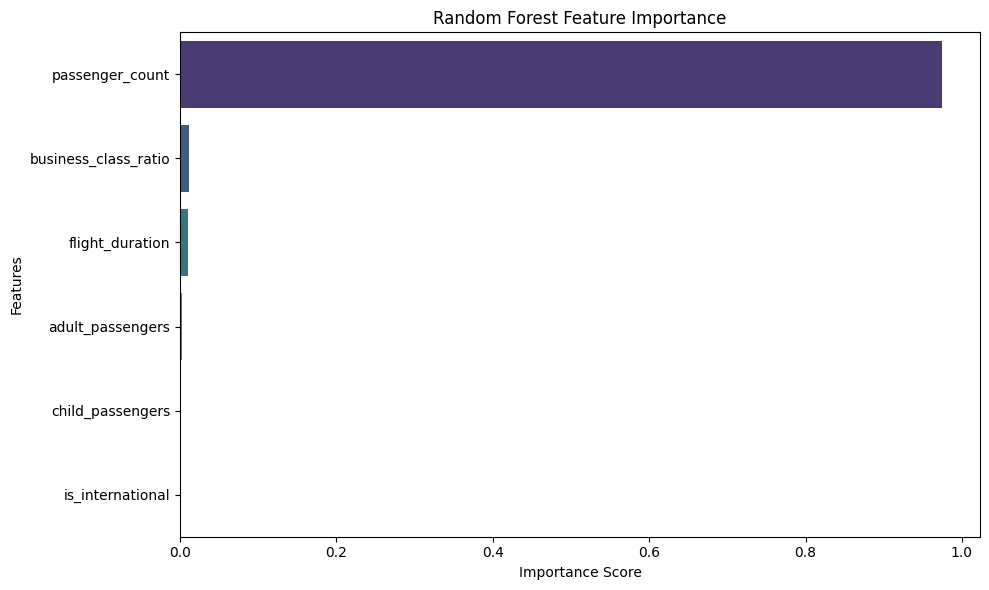

                Feature  Importance
1       passenger_count    0.974400
4  business_class_ratio    0.011358
0       flight_duration    0.010501
2      adult_passengers    0.002612
3      child_passengers    0.000977
5      is_international    0.000152


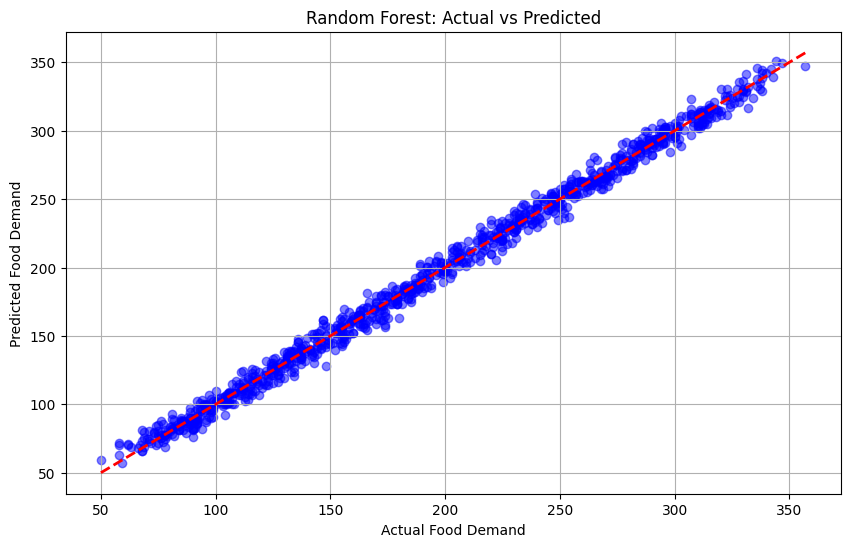

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('airline_food_data_last.csv')

print(f"Data Loaded. Shape: {df.shape}")
df.head()

X = df.drop(['flight_id', 'total_food_demand'], axis=1)
y = df['total_food_demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=28)

print("Training Random Forest Model...")
rf_model.fit(X_train, y_train)
print("Training Complete.")

y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Performance Metrics:")
print(f"R-squared (R2): {rf_r2:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")

importances = rf_model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print(feature_imp_df)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Food Demand')
plt.ylabel('Predicted Food Demand')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.show()